## Creating a SQL Database



Quantitative Structure-Property Relationships (QSPR) and Quantitative
Structure-Activity Relationships (QSAR) use statistical models to relate a set
of predictor values to a response variable. Molecules are described using a set
observed properties. In QSPR and QSAR, physico-chemical properties of theoretical
biological outcome. We will use python to import data in preparation for 
QSPR and QSAR.



A molecular descriptor is &ldquo;final result of a logical and mathematical procedure,
which transforms chemical information encoded within a symbolic repre-sentation
of a molecule into a useful number or the result of some standardized
chemoinformatics* **2009** Wiley‑VCH, Weinheim). You are already familiar with
queried PubChem for data such as XLogP. We&rsquo;ll examine just a few simple



Clearly we have been using algorithms for calculating these indices. This is
time consuming for an individual, but programs can be used to complete this much



In [22]:
from rdkit import Chem
CARBONYL = Chem.MolFromSmarts("C=O")
def count_carbonyls(smiles: str) -> int:
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError("Invalid SMILES")
    return len(m.GetSubstructMatches(CARBONYL, uniquify=True))

# example
count_carbonyls("CC(=O)OC(=O)C")


2

### Molecule characteristics



### Looping through a list of molecules



2
2
1
2
2


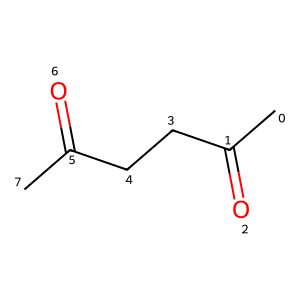

In [23]:
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True
params = Chem.SmilesParserParams()
params.removeHs=False

IPythonConsole.molSize = (300, 300)   # Change image size
IPythonConsole.ipython_useSVG = True  # Change output to SVG
smiles = ["O=C=O", "CC(=O)OC(=O)C", "CC(=O)C", "CC(=O)CC(=O)C", "CC(=O)CCC(=O)C"]
for smile in smiles:
    query = Chem.MolFromSmiles(
    smile,
    params)
    print(count_carbonyls(smile))
query


## Load data to analyze
This set of smiles codes, solubility and binding data comes from a pharma company



For this exercise we will be using the [pandas](https://pandas.pydata.org/) (Python Data Analysis) library to
help us read, write and manage data. We will also use matplotlib to generate
graphs.


In [24]:
# import and view drug data from : https://github.com/molecularinformatics/Computational-ADME/tree/main
# described here: https://pubs.acs.org/doi/10.1021/acs.jcim.3c00160
import os
import pandas as pd
data_dir = os.path.join('data')
file_path = os.path.join(data_dir, 'ADME_public_set_3521.csv')
df = pd.read_csv(file_path)
df.head(10) # Shows the top X entries in the dataframe


,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg)
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920
3,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,0.675687,1.026662,1.657056,-1.158015,-1.403403,1.027920
4,Mol5,324059015,CC(C)(O)CCn1cc2cc(NC(=O)c3cccc(C(F)(F)F)n3)c(C...,emolecules,0.996380,1.010597,NaN,1.015611,1.092264,1.629093
5,Mol6,316230505,CC#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C...,emolecules,1.397349,0.860626,1.033424,0.163857,-0.639533,2.376374
6,Mol7,299985775,CC(C)NCC(O)COc1cccc2ccccc12,emolecules,1.327232,-0.162401,NaN,NaN,1.347759,3.318276
7,Mol8,538570,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...,emolecules,1.458063,2.091561,NaN,-0.917215,-0.943095,2.728062
8,Mol9,EN300-97039,C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)...,enamineBB_pmc,2.756500,0.725160,0.933990,0.626030,-0.358530,3.243300
9,Mol10,44811418,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3...,emolecules,1.630824,1.301829,NaN,-1.384078,-0.504456,3.192741


Some data is missing. Python uses Nan (not a number) to indicate a missing value.
Before analyzing and plotting this data, let's trim out rows that have Nan for solubility. Let's 
also trim the list length to the first 500 items. We'll talk about random and scaffold based splits 
in a future class.


In [25]:
# Select rows with 'LOG SOLUBILITY PH 6.8 (ug/mL)' not NaN
non_nan_df = df.dropna(subset=['LOG SOLUBILITY PH 6.8 (ug/mL)'])

carbonyl_count_list = []
for smiles in non_nan_df['SMILES'][0:499]:
    carbonyl_count = count_carbonyls(smiles)
    carbonyl_count_list.append(carbonyl_count)

carbonyl_count_df = pd.DataFrame(carbonyl_count_list)
print(len(carbonyl_count_list))
# non_nan_df.describe()
# non_nan_df.head(10)
carbonyl_count_df.head(10)# defaults to 5


499


,0
0,1
1,1
2,1
3,2
4,1
5,0
6,1
7,0
8,0
9,1


Let's switch to a simpler and smaller dataset to try out creation of a SQL database



In [26]:
#load this in 
df_bp = pd.read_csv("data/BP.csv") # read in the file into a pandas dataframe
#and look through the data
df_bp.head(5)



,compound,name,BP_C,BP_K,SMILES,MW
0,1,Methane,-162.2,110.95,C,16.043
1,2,Ethane,-88.6,184.55,CC,30.070
2,3,propane,-42.2,230.95,CCC,44.100
3,4,butane,-0.1,273.05,CCCC,58.120
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120


To explore creating a database, and creating an API start with:

pip install Flask

pip install Flask-Cors

pip install sqlalchemy

And if you don't have sqlite installed (it comes with recent python installs):

pip install db-sqlite3

more info: 
https://flask.palletsprojects.com/en/2.2.x/quickstart/ 
https://docs.sqlalchemy.org/en/14/intro.html


First we will use an engine from sqlalchemy to convert our dataframe to a SQL (structured query language) database using sqlite, the SQL language built into python. The name of the database will be 'chemical'.


In [27]:
from sqlalchemy import create_engine, text

# Create an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)

# Assuming df_bp is a pandas DataFrame, write it to the database
df_bp.to_sql('chemical', con=engine, if_exists='replace', index=False)

# Use a connection object to execute queries
with engine.connect() as connection:
    # Use the sqlalchemy text() function to allow raw SQL execution
    query = text("SELECT * FROM chemical WHERE SMILES = 'CC'")
    result = connection.execute(query)

    # Fetch and print all rows
    rows = result.fetchall()
    for row in rows:
        print(row)


(2, 'Ethane', -88.6, 184.55, 'CC', 30.07)


Once the 'chemical' database is created it can be interrogated with CRUD (create, read, update, and delete) operations using the SQLite language sent through the engine. Here we use the engine to execute a SELECT statement. In SQL the * means "all" so we are selecting all rows of the database where the column "name" has the value "Methane". Appending fetchall() to the end returns the result to us.


In [28]:
with engine.connect() as connection:
    query = text("SELECT 'chemical'.'name' FROM 'chemical' WHERE 'chemical'.'BP_C' is -0.1")
    result = connection.execute(query)

    # Fetch and print all rows
    rows = result.fetchall()
    for row in rows:
        print(row)


('butane',)


In [30]:
import json

We can embed this engine in a function that returns the result as a dictionary in JSON (JavaScript Object Notation) format commonly used in http requests.


In [ ]:
import json
def get_chemicals(bp_value):
    chemicals = {}
    df = pd.read_csv("data/BP.csv")
    
    # Create SQLite engine
    engine = create_engine('sqlite://', echo=False)
    
    # Save DataFrame to SQL database
    df.to_sql('chemical', con=engine, if_exists='replace', index=False)
    
    # Define column names (in case you need to map them later)
    col_names = ['index', 'compound_number', 'name', 'BP_C', 'BP_K', 'SMILES', 'MW']
    
    try:
        # Establish a connection using context manager
        with engine.connect() as connection:
            
            # Use text() to run the SQL query
            query = text("SELECT * FROM chemical WHERE BP_C = :bp_value")
            result = connection.execute(queryasdf, {'bp_value': bp_value})
            
            # Fetch all rows matching the boiling point condition as mappings (dictionary-like rows)
            rows = result.mappings().all()  # Use .mappings() to access rows by column names
            
            if not rows:
                print("No results found")
                return json.dumps({})
            
            # Prepare the dictionary of chemicals
            for row in rows:
                # `row` is now a dictionary-like object, so you can access values by column name
                chemical = {col: row[col] for col in col_names if col in row}
                chemicals[row['name']] = chemical  # Use 'name' as the key for each chemical

    except Exception as e:
        print(f"An error occurred: {e}")
        return json.dumps({})

    # Convert dictionary to JSON for output
    chemicals_out = json.dumps(chemicals, separators=(',', ':'))
    
    return chemicals_out


Now check this function out by submitting a bp_value. It must be sent as a string because of how the database was setup. More nuanced methods of creating your SQL schema where you can use integers or floating point numbers are described here: https://levelup.gitconnected.com/full-stack-web-app-with-python-react-and-bootstrap-backend-8592baa6e4eb


In [39]:
bp_value = -0.1
get_chemicals(bp_value)


'{"butane":{"name":"butane","BP_C":-0.1,"BP_K":273.05,"SMILES":"CCCC","MW":58.12}}'

Now we will put it all together into an app using flask and create an API. Follow the directions below carefully. Running this code inside Jupyter casues problems becasue there is no easy way to shutdown your app. This block repeats material from earlier so that it is available to this standalone app.


In [ ]:
# don't run the "app.run()" line in Jupyter. 
# Instead, copy the text of  this block and save as "first_app.py" after uncommenting the last 2 lines and 
# run it from a terminal or prompt with this command: "python3 first_app.py"
# The BP.csv file must be in the same folder

import pandas as pd
from sqlalchemy import create_engine, text
from flask import Flask, request, jsonify #added to top of file
from flask_cors import CORS #added to top of file
import json

def get_chemicals(bp_value):
    chemicals = {}
    df = pd.read_csv("../data/BP.CSV")
    
    # Create SQLite engine
    engine = create_engine('sqlite://', echo=False)
    
    # Save DataFrame to SQL database
    df.to_sql('chemical', con=engine, if_exists='replace', index=False)
    
    # Define column names (in case you need to map them later)
    col_names = ['index', 'compound_number', 'name', 'BP_C', 'BP_K', 'SMILES', 'MW']
    
    try:
        # Establish a connection using context manager
        with engine.connect() as connection:
            
            # Use text() to run the SQL query
            query = text("SELECT * FROM chemical WHERE BP_C = :bp_value")
            result = connection.execute(query, {'bp_value': bp_value})
            
            # Fetch all rows matching the boiling point condition as mappings (dictionary-like rows)
            rows = result.mappings().all()  # Use .mappings() to access rows by column names
            
            if not rows:
                print("No results found")
                return json.dumps({})
            
            # Prepare the dictionary of chemicals
            for row in rows:
                # `row` is now a dictionary-like object, so you can access values by column name
                chemical = {col: row[col] for col in col_names if col in row}
                chemicals[row['name']] = chemical  # Use 'name' as the key for each chemical

    except Exception as e:
        print(f"An error occurred: {e}")
        return json.dumps({})

    # Convert dictionary to JSON for output
    chemicals_out = json.dumps(chemicals, separators=(',', ':'))
    
    return chemicals_out

app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "*"}})

@app.route('/api/chemical/<name>', methods=['GET','POST'])

def api_get_users(name):
    return jsonify(get_chemicals(name))

if __name__ == ('__main__'):
    app.run()


In [ ]:
import requests
mydata = '-0.1'
url = 'http://127.0.0.1:5000/api/chemical/-0.1'
req = requests.post(url, data = mydata)
print(req.text)


<!doctype html>
<html lang=en>
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>



Assignment, option 1:

create a second SQL database from the solubility data we started with. Create a query that returns a 
smiles(or many) based on an input solubility value


Assignment, option 2:

Create a carbonyl counting app



Hints:

You can do the API assignment using a GET instead of a POST. The main issue to solve is that you need to pass a variable following the variable rules discussed here: https://flask.palletsprojects.com/en/2.2.x/quickstart/#routingLinks to an external site.

And after getting the variable from the API it needs to get passed again to get_chemicals.

It is easier to troubleshoot in Jupyter compared to running scripts from terminal/command prompt. I’d recommend doing as much work as you can in Jupyter before saving the script and moving to terminal.

Save your file ending in .py

When you run your script in terminal or prompt, make sure that you are in an environment that has flask, flask_cors, sqlalchemy, json, and pandas installed.

You can check what packages are available in a given environment by typing “pip list in your terminal. If you are unable to navigate to the environment you want, you can always create a new one with conda from the terminal and install the packages you need.

